In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/7r3y70dd/dataSheets/refs/heads/main/Accidental_Drug_Related_Deaths_2012-2018.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5105 non-null   object 
 1   Date                 5103 non-null   object 
 2   DateType             5103 non-null   object 
 3   Age                  5102 non-null   float64
 4   Sex                  5099 non-null   object 
 5   Race                 5092 non-null   object 
 6   ResidenceCity        4932 non-null   object 
 7   ResidenceCounty      4308 non-null   object 
 8   ResidenceState       3556 non-null   object 
 9   DeathCity            5100 non-null   object 
 10  DeathCounty          4005 non-null   object 
 11  Location             5081 non-null   object 
 12  LocationifOther      590 non-null    object 
 13  DescriptionofInjury  4325 non-null   object 
 14  InjuryPlace          5039 non-null   object 
 15  InjuryCity           3349 non-null   o

In [4]:
(df['COD'].str.contains('and Fentanyl') == True).mean()

0.060528893241919686

<Axes: ylabel='OtherSignifican'>

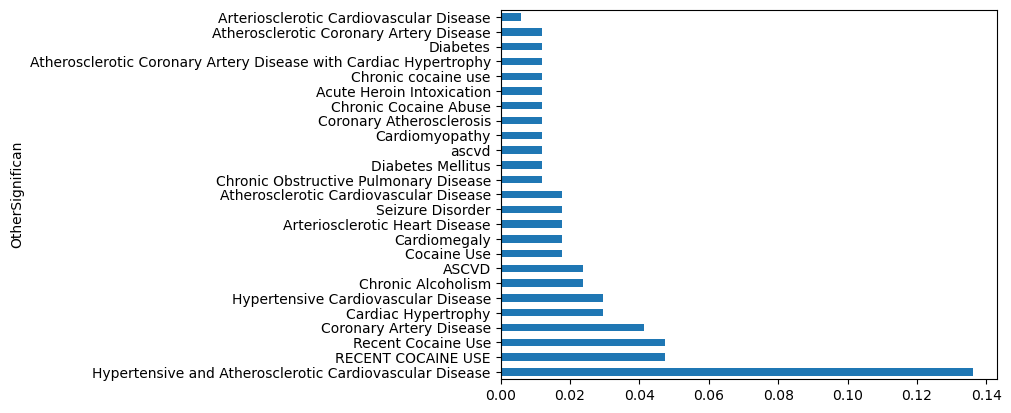

In [5]:
df['OtherSignifican'].value_counts(normalize=True)[:25].plot.barh()

##### plt.figure(figsize=(6, 8))
df.isna().mean().sort_values().plot.barh();

In [6]:
df['Location'].value_counts()

Location
Residence            2677
Hospital             1626
Other                 773
Convalescent Home       3
Nursing Home            1
Hospice                 1
Name: count, dtype: int64

In [7]:
df['MannerofDeath'].value_counts()

MannerofDeath
Accident    5066
Pending       14
accident      13
ACCIDENT       1
Natural        1
Name: count, dtype: int64

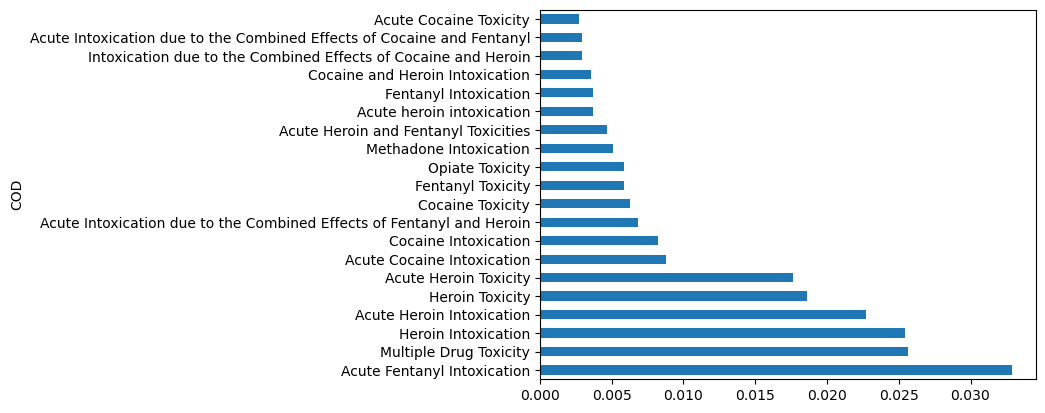

In [8]:
df['COD'].value_counts(normalize=True)[:20].plot.barh();

In [9]:
df['DeathCity'].value_counts(normalize=True).cumsum()[:10]

DeathCity
HARTFORD       0.110392
NEW HAVEN      0.183725
WATERBURY      0.255882
BRIDGEPORT     0.322745
NEW BRITAIN    0.367255
MERIDEN        0.395686
BRISTOL        0.423922
NORWICH        0.452157
NEW LONDON     0.479020
DANBURY        0.504706
Name: proportion, dtype: float64

In [10]:
df['DescriptionofInjury'].value_counts()

DescriptionofInjury
Substance Abuse          1618
Drug Use                  491
Substance abuse           402
Ingestion                 334
substance abuse           298
                         ... 
Ingested Opiod              1
Abused medication           1
Used opiates                1
Inhalation; Ingestion       1
SUBSTANCE  ABUSE            1
Name: count, Length: 320, dtype: int64

In [11]:
drug_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
    'OpiateNOS', 'AnyOpioid'
]

for col in drug_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

(df == 'Y').sum()

Unique values in Heroin: [nan 'Y']
Unique values in Cocaine: [nan 'Y']
Unique values in Fentanyl: ['Y' nan 'Y-A' 'Y POPS' 'Y (PTCH)']
Unique values in FentanylAnalogue: [nan 'Y']
Unique values in Oxycodone: [nan 'Y']
Unique values in Oxymorphone: [nan 'Y']
Unique values in Ethanol: [nan 'Y']
Unique values in Hydrocodone: ['Y' nan]
Unique values in Benzodiazepine: ['Y' nan]
Unique values in Methadone: [nan 'Y']
Unique values in Amphet: [nan 'Y']
Unique values in Tramad: [nan 'Y']
Unique values in Morphine_NotHeroin: [nan 'Y' 'YES' 'STOLE MEDS' 'NO RX BUT STRAWS' 'PCP NEG']
Unique values in Hydromorphone: [nan 'Y']
Unique values in OpiateNOS: [nan 'Y']
Unique values in AnyOpioid: [nan 'Y' 'N']


ID                        0
Date                      0
DateType                  0
Age                       0
Sex                       0
Race                      0
ResidenceCity             0
ResidenceCounty           0
ResidenceState            0
DeathCity                 0
DeathCounty               0
Location                  0
LocationifOther           0
DescriptionofInjury       0
InjuryPlace               0
InjuryCity                0
InjuryCounty              0
InjuryState               0
COD                       0
OtherSignifican           0
Heroin                 2529
Cocaine                1521
Fentanyl               2228
FentanylAnalogue        389
Oxycodone               607
Oxymorphone             108
Ethanol                1247
Hydrocodone             118
Benzodiazepine         1343
Methadone               474
Amphet                  159
Tramad                  130
Morphine_NotHeroin       38
Hydromorphone            25
Other                     0
OpiateNOS           

In [12]:
df.head()


ID                    Date      DateType   Age     Sex          Race  \
0  14-0273  06/28/2014 12:00:00 AM  DateReported   NaN     NaN           NaN   
1  13-0102  03/21/2013 12:00:00 AM   DateofDeath  48.0    Male         Black   
2  16-0165  03/13/2016 12:00:00 AM   DateofDeath  30.0  Female         White   
3  16-0208  03/31/2016 12:00:00 AM   DateofDeath  23.0    Male         White   
4  13-0052  02/13/2013 12:00:00 AM   DateofDeath  22.0    Male  Asian, Other   

  ResidenceCity ResidenceCounty ResidenceState  DeathCity  ...  \
0           NaN             NaN            NaN        NaN  ...   
1       NORWALK             NaN            NaN    NORWALK  ...   
2    SANDY HOOK       FAIRFIELD             CT    DANBURY  ...   
3           RYE     WESTCHESTER             NY  GREENWICH  ...   
4      FLUSHING          QUEENS            NaN  GREENWICH  ...   

  Morphine_NotHeroin Hydromorphone Other OpiateNOS AnyOpioid MannerofDeath  \
0                NaN           NaN   NaN       NaN       NaN      Accident   
1                NaN           NaN   NaN       NaN       NaN      Accident   
2                NaN           NaN   NaN       NaN         Y      Accident   
3                NaN           NaN   NaN       NaN         Y      Accident   
4                NaN           NaN   NaN       NaN       NaN      Accident   

                             DeathCityGeo  \
0             CT\n(41.575155, -72.738288)   
1     Norwalk, CT\n(41.11805, -73.412906)   
2    Danbury, CT\n(41.393666, -73.451539)   
3  Greenwich, CT\n(41.026526, -73.628549)   
4  Greenwich, CT\n(41.026526, -73.628549)   

                          ResidenceCityGeo                InjuryCityGeo  \
0              CT\n(41.575155, -72.738288)  CT\n(41.575155, -72.738288)   
1      NORWALK, CT\n(41.11805, -73.412906)  CT\n(41.575155, -72.738288)   
2  SANDY HOOK, CT\n(41.419998, -73.282501)                          NaN   
3                                      NaN                          NaN   
4                                      NaN  CT\n(41.575155, -72.738288)   

  Town Index  
0       83.0  
1      103.0  
2       34.0  
3       57.0  
4       57.0  

[5 rows x 42 columns]

<Axes: >

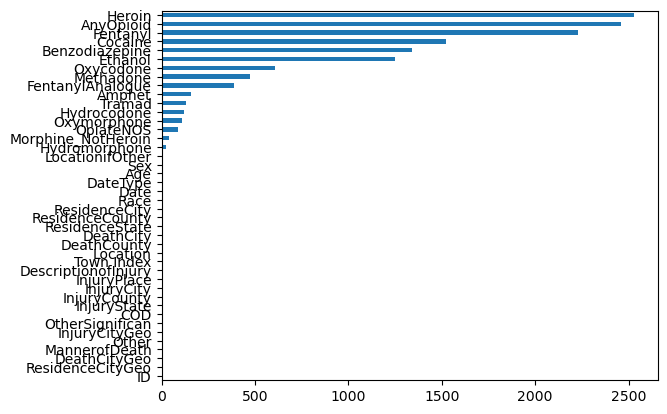

In [13]:
(df == 'Y').sum().sort_values().plot.barh()

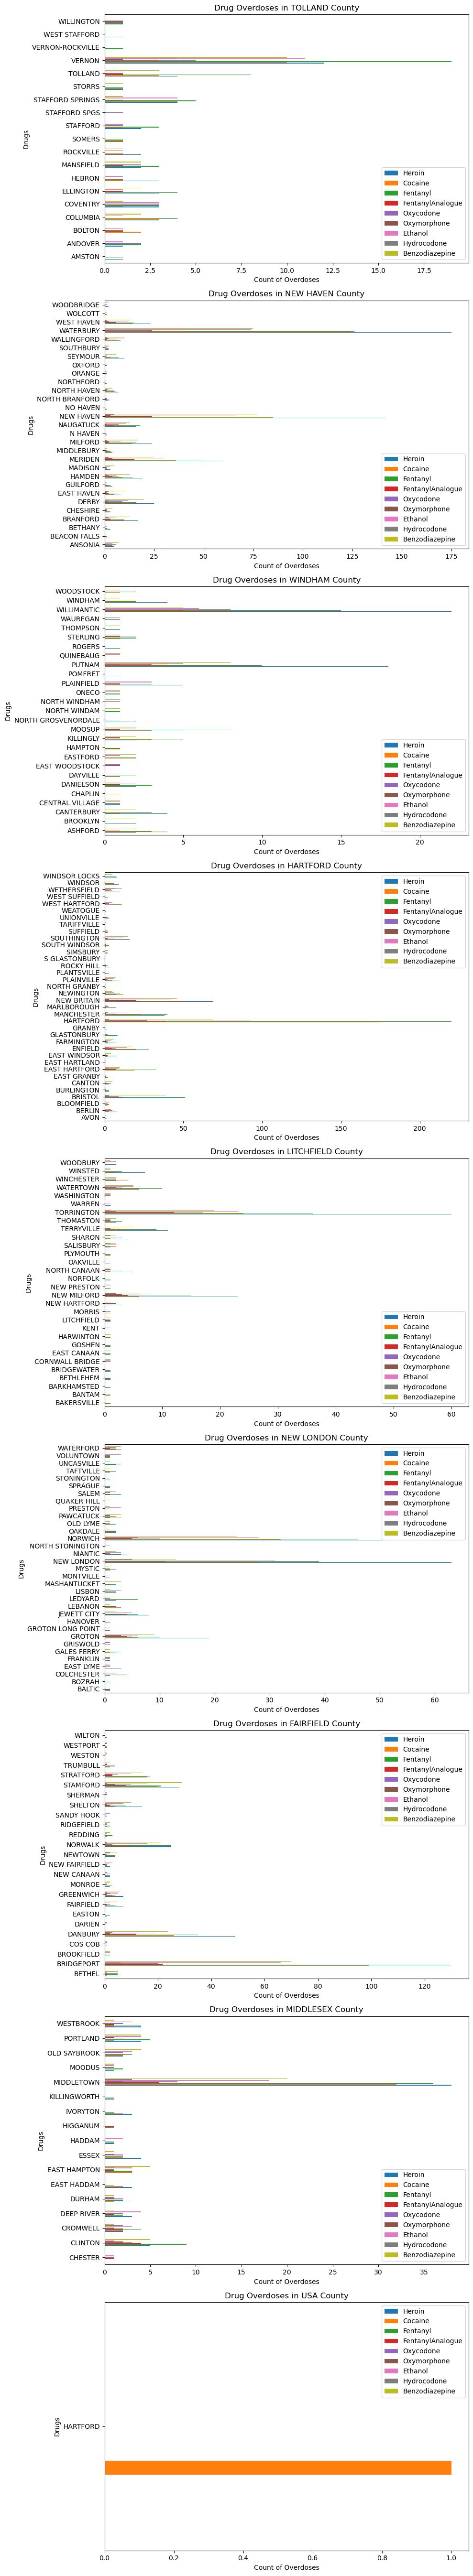

In [14]:
# drug_columns = [
#     'Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
#     'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 
#     'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS'
# ]

# filtered_data = df[df[drug_columns].eq('Y').any(axis=1)]

# grouped_data = filtered_data.groupby(['DeathCity', 'DeathCounty', 'Location'])[drug_columns].apply(lambda x: (x == 'Y').sum())

# grouped_data.plot.barh()

drug_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
    'Ethanol', 'Hydrocodone', 'Benzodiazepine'
]

filtered_data = df[df[drug_columns].eq('Y').any(axis=1)]

grouped_data = filtered_data.groupby(['DeathCity', 'DeathCounty'])[drug_columns].apply(lambda x: (x == 'Y').sum())

deathcounties = grouped_data.index.get_level_values('DeathCounty').unique()

fig, axes = plt.subplots(len(deathcounties), 1, figsize=(10, 6 * len(deathcounties)))

if len(deathcounties) == 1:
    axes = [axes]

for i, county in enumerate(deathcounties):
    ax = axes[i]
    # Filter the grouped_data for the current DeathCounty
    county_data = grouped_data.xs(county, level='DeathCounty')
    county_data.plot.barh(ax=ax, title=f"Drug Overdoses in {county} County")
    ax.set_xlabel("Count of Overdoses")
    ax.set_ylabel("Drugs")

plt.tight_layout()
plt.show()

/var/folders/zf/nq16bky57gb3bjfjhl7bctxh0000gn/T/ipykernel_18052/3453373891.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[drug_columns] = df[drug_columns].replace(value_map).fillna(0)


<Axes: >

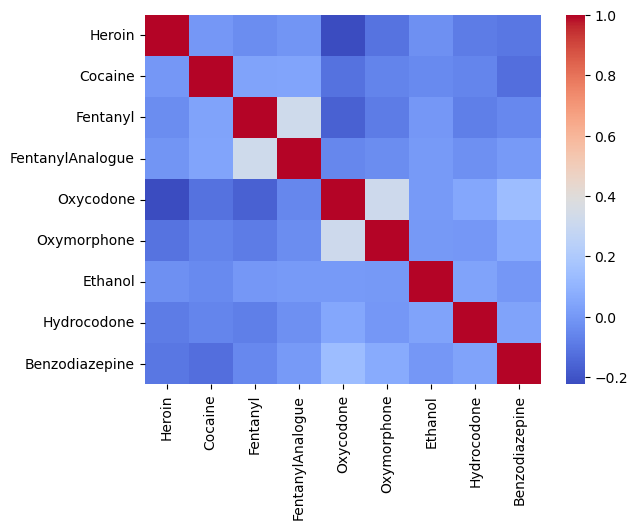

In [15]:
value_map = {
    'Y': 1,
    'N': 0,
    'Y-A': 1,
    'Y POPS': 1,
    'Y (PTCH)': 1,
    'YES': 1,
    'STOLE MEDS': 1,
    'NO RX BUT STRAWS': 1,
    'PCP NEG': 0,
    np.nan: 0
}

df[drug_columns] = df[drug_columns].replace(value_map).fillna(0)

df[drug_columns] = df[drug_columns].astype(int)

correlation_matrix = df[drug_columns].corr()

sns.heatmap(correlation_matrix, cmap='coolwarm')

In [16]:
city_totals = df.groupby('ResidenceCity')[drug_columns].count()

total_drugs_per_city = city_totals.sum(axis=1)

top10 = total_drugs_per_city.nlargest(10)

print(top10)

ResidenceCity
HARTFORD       2664
WATERBURY      2421
BRIDGEPORT     2169
NEW HAVEN      2016
NEW BRITAIN    1728
BRISTOL        1206
MERIDEN        1143
NORWICH         981
MANCHESTER      927
TORRINGTON      900
dtype: int64


<Axes: ylabel='ResidenceCity'>

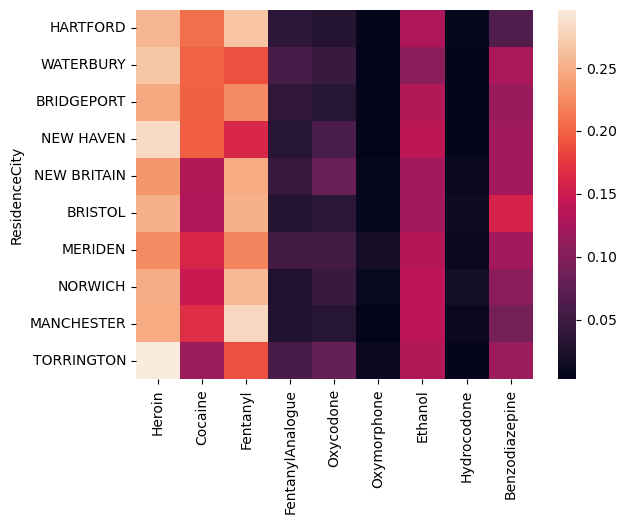

In [17]:
top_cities = top10.index

top_cities_df = df[df['ResidenceCity'].isin(top_cities)]

city_drug_totals = top_cities_df.groupby('ResidenceCity')[drug_columns].sum()

city_totals = city_drug_totals.sum(axis=1)

drug_probabilities = city_drug_totals.div(city_totals, axis=0)

drug_probabilities = drug_probabilities.loc[top_cities]

sns.heatmap(drug_probabilities)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5105 non-null   object 
 1   Date                 5103 non-null   object 
 2   DateType             5103 non-null   object 
 3   Age                  5102 non-null   float64
 4   Sex                  5099 non-null   object 
 5   Race                 5092 non-null   object 
 6   ResidenceCity        4932 non-null   object 
 7   ResidenceCounty      4308 non-null   object 
 8   ResidenceState       3556 non-null   object 
 9   DeathCity            5100 non-null   object 
 10  DeathCounty          4005 non-null   object 
 11  Location             5081 non-null   object 
 12  LocationifOther      590 non-null    object 
 13  DescriptionofInjury  4325 non-null   object 
 14  InjuryPlace          5039 non-null   object 
 15  InjuryCity           3349 non-null   o

In [19]:
df.head(20)

ID                    Date      DateType   Age     Sex  \
0   14-0273  06/28/2014 12:00:00 AM  DateReported   NaN     NaN   
1   13-0102  03/21/2013 12:00:00 AM   DateofDeath  48.0    Male   
2   16-0165  03/13/2016 12:00:00 AM   DateofDeath  30.0  Female   
3   16-0208  03/31/2016 12:00:00 AM   DateofDeath  23.0    Male   
4   13-0052  02/13/2013 12:00:00 AM   DateofDeath  22.0    Male   
5   14-0277  06/29/2014 12:00:00 AM   DateofDeath  23.0    Male   
6   12-0205  08/12/2012 12:00:00 AM   DateofDeath  21.0  Female   
7   13-0404  11/10/2013 12:00:00 AM   DateofDeath  40.0  Female   
8   12-0107  04/25/2012 12:00:00 AM   DateofDeath  40.0    Male   
9   13-0161  05/15/2013 12:00:00 AM   DateofDeath  50.0    Male   
10  12-0218  08/23/2012 12:00:00 AM   DateofDeath  26.0  Female   
11  15-0334  07/05/2015 12:00:00 AM  DateReported  49.0  Female   
12  15-0728                     NaN           NaN   NaN     NaN   
13  15-0232  05/14/2015 12:00:00 AM  DateReported  50.0    Male   
14  16-0028  01/13/2016 12:00:00 AM   DateofDeath  29.0    Male   
15  13-0279  08/19/2013 12:00:00 AM   DateofDeath  45.0    Male   
16  14-0042  01/29/2014 12:00:00 AM   DateofDeath  29.0  Female   
17  12-0060  03/02/2012 12:00:00 AM   DateofDeath  42.0    Male   
18  16-0065  01/30/2016 12:00:00 AM   DateofDeath  54.0    Male   
19  16-0889  12/20/2016 12:00:00 AM   DateofDeath  32.0    Male   

               Race  ResidenceCity ResidenceCounty ResidenceState  \
0               NaN            NaN             NaN            NaN   
1             Black        NORWALK             NaN            NaN   
2             White     SANDY HOOK       FAIRFIELD             CT   
3             White            RYE     WESTCHESTER             NY   
4      Asian, Other       FLUSHING          QUEENS            NaN   
5             White        BRISTOL             NaN            NaN   
6             White  WEST HARTFORD        HARTFORD            NaN   
7             White         HAMDEN       NEW HAVEN            NaN   
8             White  EAST HARTFORD        HARTFORD            NaN   
9             White      MONTVILLE      NEW LONDON            NaN   
10  Hispanic, White            NaN             NaN            NaN   
11            White            NaN             NaN            NaN   
12              NaN            NaN             NaN            NaN   
13            White        DANBURY       FAIRFIELD             CT   
14            Black      NEW HAVEN       NEW HAVEN             CT   
15            White       HARTFORD        HARTFORD            NaN   
16            White     CANTERBURY             NaN            NaN   
17            White    WALLINGFORD       NEW HAVEN            NaN   
18            White     MIDDLETOWN       MIDDLESEX             CT   
19            White        WINDHAM         WINDHAM             CT   

        DeathCity  ... Morphine_NotHeroin Hydromorphone Other OpiateNOS  \
0             NaN  ...                NaN           NaN   NaN       NaN   
1         NORWALK  ...                NaN           NaN   NaN       NaN   
2         DANBURY  ...                NaN           NaN   NaN       NaN   
3       GREENWICH  ...                NaN           NaN   NaN       NaN   
4       GREENWICH  ...                NaN           NaN   NaN       NaN   
5         BRISTOL  ...                NaN           NaN   NaN       NaN   
6   WEST HARTFORD  ...                NaN           NaN   NaN       NaN   
7       NEW HAVEN  ...                NaN           NaN   NaN       NaN   
8   EAST HARTFORD  ...                NaN           NaN   NaN       NaN   
9       MONTVILLE  ...                NaN           NaN   NaN       NaN   
10      STRATFORD  ...                NaN           NaN   NaN       NaN   
11      NEW HAVEN  ...                NaN           NaN   NaN       NaN   
12            NaN  ...                NaN           NaN   NaN       NaN   
13        DANBURY  ...                NaN           NaN   NaN       NaN   
14      NEW HAVEN  ...    

In [20]:
df.apply([pd.Series.nunique, pd.Series.unique]).transpose()

nunique                                             unique
ID                     5105  [14-0273, 13-0102, 16-0165, 16-0208, 13-0052, ...
Date                   2098  [06/28/2014 12:00:00 AM, 03/21/2013 12:00:00 A...
DateType                  2                   [DateReported, DateofDeath, nan]
Age                      65  [nan, 48.0, 30.0, 23.0, 22.0, 21.0, 40.0, 50.0...
Sex                       3                       [nan, Male, Female, Unknown]
Race                     11  [nan, Black, White, Asian, Other, Hispanic, Wh...
ResidenceCity           370  [nan, NORWALK, SANDY HOOK, RYE, FLUSHING, BRIS...
ResidenceCounty          84  [nan, FAIRFIELD, WESTCHESTER, QUEENS, HARTFORD...
ResidenceState           26  [nan, CT, NY, PA, MA, FL, TN, GA, CA, ME, OK, ...
DeathCity               222  [nan, NORWALK, DANBURY, GREENWICH, BRISTOL, WE...
DeathCounty               9  [nan, FAIRFIELD, HARTFORD, NEW HAVEN, NEW LOND...
Location                  6  [nan, Hospital, Residence, Other, Nursing Home...
LocationifOther         322  [nan, Honey Spot, Motel 6, Hotel/Motel, Park, ...
DescriptionofInjury     320  [substance, nan, Substance Abuse, substance ab...
InjuryPlace              71  [nan, Unknown, Residence, Other, Hotel or Mote...
InjuryCity              234  [nan, UNKNOWN, RYE, NEW HAVEN, MIDDLETOWN, WIN...
InjuryCounty             12  [nan, NEW HAVEN, HARTFORD, LITCHFIELD, MIDDLES...
InjuryState               3                         [nan, CT, NY, CONNECTICUT]
COD                    3193  [Acute fent, hydrocod, benzodiazepine, Cocaine...
OtherSignifican          92  [nan, Acute Cocaine, RECENT COCAINE USE, Chron...
Heroin                    2                                             [0, 1]
Cocaine                   2                                             [0, 1]
Fentanyl                  2                                             [1, 0]
FentanylAnalogue          2                                             [0, 1]
Oxycodone                 2                                             [0, 1]
Oxymorphone               2                                             [0, 1]
Ethanol                   2                                             [0, 1]
Hydrocodone               2                                             [1, 0]
Benzodiazepine            2                                             [1, 0]
Methadone                 1                                           [nan, Y]
Amphet                    1                                           [nan, Y]
Tramad                    1                                           [nan, Y]
Morphine_NotHeroin        5  [nan, Y, YES, STOLE MEDS, NO RX BUT STRAWS, PC...
Hydromorphone             1                                           [nan, Y]
Other                   134  [nan, Bupren, lsd, hydromorph, opiate, BUPREN,...
OpiateNOS                 1                                           [nan, Y]
AnyOpioid                 2                                        [nan, Y, N]
MannerofDeath             5  [Accident, accident, nan, Pending, ACCIDENT, N...
DeathCityGeo            374  [CT\n(41.575155, -72.738288), Norwalk, CT\n(41...
ResidenceCityGeo        289  [CT\n(41.575155, -72.738288), NORWALK, CT\n(41...
InjuryCityGeo           226  [CT\n(41.575155, -72.738288), nan, NEW HAVEN, ...
Town Index              162  [83.0, 103.0, 34.0, 57.0, 17.0, 155.0, 93.0, 4...

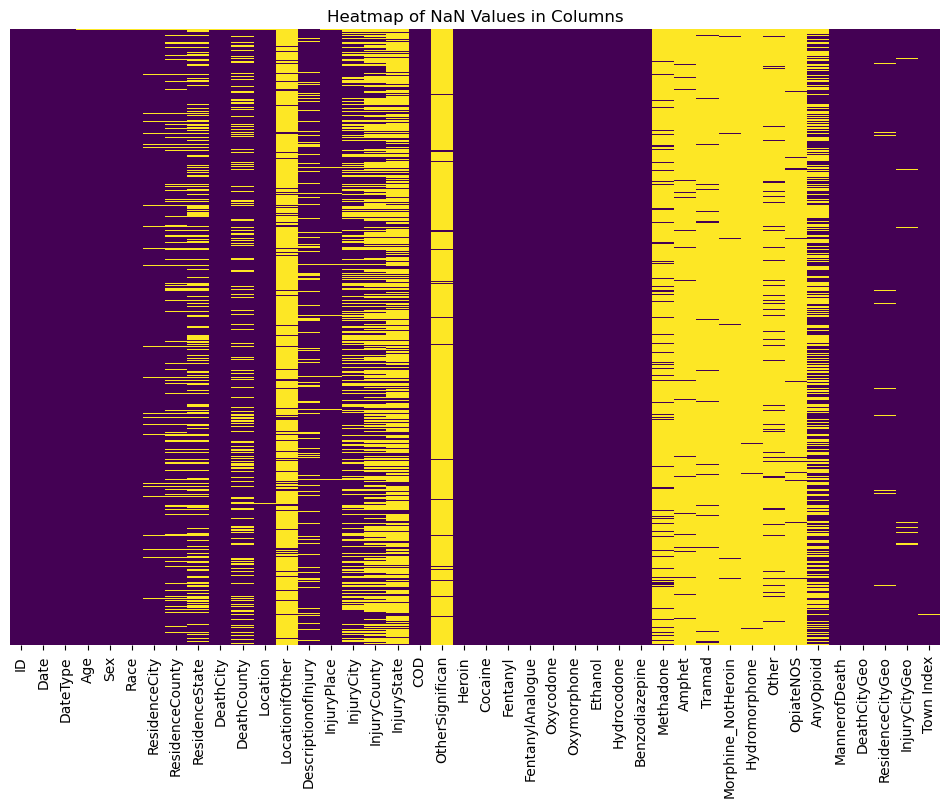

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of NaN Values in Columns')
plt.show()

In [22]:
nan_counts = df.isna().sum()
print(nan_counts)

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                    0
Cocaine                   0
Fentanyl                  0
FentanylAnalogue          0
Oxycodone                 0
Oxymorphone               0
Ethanol                   0
Hydrocodone               0
Benzodiazepine            0
Methadone              4631
Amphet                 4946
Tramad                 4975
Morphine_NotHeroin     5063
Hydromorphone          5080
Other                  4670
OpiateNOS           

In [23]:
print(df['InjuryPlace'].value_counts())

InjuryPlace
Residence                 3601
Other                      269
Residential Building       241
Hotel or Motel             227
Unknown                    176
                          ... 
Campgrounds                  1
residential building         1
Shopping Center              1
Residential building         1
River, Stream or Canal       1
Name: count, Length: 71, dtype: int64


In [24]:
def to_lowercase(df, column_name):
    df[column_name] = df[column_name].astype(str).str.lower()
    return df

In [25]:
to_lowercase(df, 'DescriptionofInjury')
to_lowercase(df, 'InjuryPlace')
to_lowercase(df, 'COD')


ID                    Date      DateType   Age     Sex  \
0     14-0273  06/28/2014 12:00:00 AM  DateReported   NaN     NaN   
1     13-0102  03/21/2013 12:00:00 AM   DateofDeath  48.0    Male   
2     16-0165  03/13/2016 12:00:00 AM   DateofDeath  30.0  Female   
3     16-0208  03/31/2016 12:00:00 AM   DateofDeath  23.0    Male   
4     13-0052  02/13/2013 12:00:00 AM   DateofDeath  22.0    Male   
...       ...                     ...           ...   ...     ...   
5100  15-0466  09/08/2015 12:00:00 AM  DateReported  43.0    Male   
5101  17-0618  07/22/2017 12:00:00 AM  DateReported  21.0    Male   
5102  18-0646  08/14/2018 12:00:00 AM   DateofDeath  30.0    Male   
5103  14-0124  03/16/2014 12:00:00 AM   DateofDeath  33.0    Male   
5104  16-0637  09/15/2016 12:00:00 AM   DateofDeath  33.0    Male   

              Race  ResidenceCity ResidenceCounty ResidenceState  DeathCity  \
0              NaN            NaN             NaN            NaN        NaN   
1            Black        NORWALK             NaN            NaN    NORWALK   
2            White     SANDY HOOK       FAIRFIELD             CT    DANBURY   
3            White            RYE     WESTCHESTER             NY  GREENWICH   
4     Asian, Other       FLUSHING          QUEENS            NaN  GREENWICH   
...            ...            ...             ...            ...        ...   
5100         White       CHESHIRE       NEW HAVEN             CT   CHESHIRE   
5101         White        MADISON       NEW HAVEN             CT  NEW HAVEN   
5102         White  LAWRENCEVILLE           TIOGA             PA    DANBURY   
5103         White       HARTFORD             NaN            NaN    WINDSOR   
5104         White      THOMASTON      LITCHFIELD             CT  WATERBURY   

      ... Morphine_NotHeroin Hydromorphone Other OpiateNOS AnyOpioid  \
0     ...                NaN           NaN   NaN       NaN       NaN   
1     ...                NaN           NaN   NaN       NaN       NaN   
2     ...                NaN           NaN   NaN       NaN         Y   
3     ...                NaN           NaN   NaN       NaN         Y   
4     ...                NaN           NaN   NaN       NaN       NaN   
...   ...                ...           ...   ...       ...       ...   
5100  ...                NaN           NaN   NaN       NaN       NaN   
5101  ...                NaN           NaN   NaN       NaN       NaN   
5102  ...                NaN           NaN   NaN       NaN         Y   
5103  ...                NaN           NaN   NaN       NaN       NaN   
5104  ...                NaN           NaN   NaN       NaN         Y   

     MannerofDeath                            DeathCityGeo  \
0         Accident             CT\n(41.575155, -72.738288)   
1         Accident     Norwalk, CT\n(41.11805, -73.412906)   
2         Accident    Danbury, CT\n(41.393666, -73.451539)   
3         Accident  Greenwich, CT\n(41.026526, -73.628549)   
4         Accident  Greenwich, CT\n(41.026526, -73.628549)   
...            ...                                     ...   
5100      Accident   CHESHIRE, CT\n(41.498834, -72.901448)   
5101      Accident  New Haven, CT\n(41.308252, -72.924161)   
5102      Accident    DANBURY, CT\n(41.393666, -73.451539)   
5103      Accident     WINDSOR, CT\n(41.852781, -72.64379)   
5104      Accident  WATERBURY, CT\n(41.554261, -73.043069)   

                             ResidenceCityGeo  \
0                 CT\n(41.575155, -72.738288)   
1         NORWALK, CT\n(41.11805, -73.412906)   
2     SANDY HOOK, CT\n(41.419998, -73.282501)   
3                                         NaN   
4                                         NaN   
...                                       ...   
5100    CHESHIRE, CT\n(41.498834, -72.901448)   
5101      MADISON, CT\n(41.271447, -72.60086)   
5102                                      NaN   
5103    HARTFORD, CT\n(41.765775, -72.673356)   
5104   THOMASTON, CT\n(41.674124, -73.073189)   

                                  

In [26]:
df.apply([pd.Series.nunique, pd.Series.unique]).transpose()

nunique                                             unique
ID                     5105  [14-0273, 13-0102, 16-0165, 16-0208, 13-0052, ...
Date                   2098  [06/28/2014 12:00:00 AM, 03/21/2013 12:00:00 A...
DateType                  2                   [DateReported, DateofDeath, nan]
Age                      65  [nan, 48.0, 30.0, 23.0, 22.0, 21.0, 40.0, 50.0...
Sex                       3                       [nan, Male, Female, Unknown]
Race                     11  [nan, Black, White, Asian, Other, Hispanic, Wh...
ResidenceCity           370  [nan, NORWALK, SANDY HOOK, RYE, FLUSHING, BRIS...
ResidenceCounty          84  [nan, FAIRFIELD, WESTCHESTER, QUEENS, HARTFORD...
ResidenceState           26  [nan, CT, NY, PA, MA, FL, TN, GA, CA, ME, OK, ...
DeathCity               222  [nan, NORWALK, DANBURY, GREENWICH, BRISTOL, WE...
DeathCounty               9  [nan, FAIRFIELD, HARTFORD, NEW HAVEN, NEW LOND...
Location                  6  [nan, Hospital, Residence, Other, Nursing Home...
LocationifOther         322  [nan, Honey Spot, Motel 6, Hotel/Motel, Park, ...
DescriptionofInjury     259  [substance, nan, substance abuse, transdermal ...
InjuryPlace              69  [nan, unknown, residence, other, hotel or mote...
InjuryCity              234  [nan, UNKNOWN, RYE, NEW HAVEN, MIDDLETOWN, WIN...
InjuryCounty             12  [nan, NEW HAVEN, HARTFORD, LITCHFIELD, MIDDLES...
InjuryState               3                         [nan, CT, NY, CONNECTICUT]
COD                    3018  [acute fent, hydrocod, benzodiazepine, cocaine...
OtherSignifican          92  [nan, Acute Cocaine, RECENT COCAINE USE, Chron...
Heroin                    2                                             [0, 1]
Cocaine                   2                                             [0, 1]
Fentanyl                  2                                             [1, 0]
FentanylAnalogue          2                                             [0, 1]
Oxycodone                 2                                             [0, 1]
Oxymorphone               2                                             [0, 1]
Ethanol                   2                                             [0, 1]
Hydrocodone               2                                             [1, 0]
Benzodiazepine            2                                             [1, 0]
Methadone                 1                                           [nan, Y]
Amphet                    1                                           [nan, Y]
Tramad                    1                                           [nan, Y]
Morphine_NotHeroin        5  [nan, Y, YES, STOLE MEDS, NO RX BUT STRAWS, PC...
Hydromorphone             1                                           [nan, Y]
Other                   134  [nan, Bupren, lsd, hydromorph, opiate, BUPREN,...
OpiateNOS                 1                                           [nan, Y]
AnyOpioid                 2                                        [nan, Y, N]
MannerofDeath             5  [Accident, accident, nan, Pending, ACCIDENT, N...
DeathCityGeo            374  [CT\n(41.575155, -72.738288), Norwalk, CT\n(41...
ResidenceCityGeo        289  [CT\n(41.575155, -72.738288), NORWALK, CT\n(41...
InjuryCityGeo           226  [CT\n(41.575155, -72.738288), nan, NEW HAVEN, ...
Town Index              162  [83.0, 103.0, 34.0, 57.0, 17.0, 155.0, 93.0, 4...

In [27]:
df['Sex'] = df['Sex'].fillna('Male')
df['ResidenceCity'] = df['ResidenceCity'].fillna('Unknown')
df['ResidenceCounty'] = df['ResidenceCounty'].fillna('Unknown')
df['ResidenceState'] = df['ResidenceState'].fillna('Unknown')
df['DeathCity'] = df['DeathCity'].fillna('Unknown')
df['DeathCounty'] = df['DeathCounty'].fillna('Unknown')
df['Location'] = df['Location'].fillna('Unknown')
# df = df.dropna(subset=['Sex', 'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 
#                        'DeathCity', 'DeathCounty', 'Location'])
# df['Other'] = df['Other'].fillna('0')
cols = ['Methadone', 'Amphet', 'Tramad', 'Hydromorphone', 'OpiateNOS', 'AnyOpioid', 'Morphine_NotHeroin']
df[cols] = df[cols].fillna(0)
# df['ResidenceState'] = df['ResidenceState'].fillna('Unknown')
df['Race'] = df['Race'].fillna('White')
df['Age'] = df['Age'].fillna(df['Age'].median())
cols = ['Methadone',   'Amphet', 'Tramad', 'Hydromorphone', 'OpiateNOS']
mapping = {'Y': 1}
df[cols] = df[cols].replace(mapping)
cols = ['AnyOpioid']
mapping = {'N': 0, 'Y': 1}
df[cols] = df[cols].replace(mapping)
cols = ['Morphine_NotHeroin']
mapping = {'STOLE MEDS': 1, 'NO RX BUT STRAWS': 1, 'PCP NEG': 1, 'YES': 1, 'Y': 1}
df[cols] = df[cols].replace(mapping)

/var/folders/zf/nq16bky57gb3bjfjhl7bctxh0000gn/T/ipykernel_18052/2838763551.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols] = df[cols].replace(mapping)
/var/folders/zf/nq16bky57gb3bjfjhl7bctxh0000gn/T/ipykernel_18052/2838763551.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols] = df[cols].replace(mapping)
/var/folders/zf/nq16bky57gb3bjfjhl7bctxh0000gn/T/ipykernel_18052/2838763551.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5105 non-null   object 
 1   Date                 5103 non-null   object 
 2   DateType             5103 non-null   object 
 3   Age                  5105 non-null   float64
 4   Sex                  5105 non-null   object 
 5   Race                 5105 non-null   object 
 6   ResidenceCity        5105 non-null   object 
 7   ResidenceCounty      5105 non-null   object 
 8   ResidenceState       5105 non-null   object 
 9   DeathCity            5105 non-null   object 
 10  DeathCounty          5105 non-null   object 
 11  Location             5105 non-null   object 
 12  LocationifOther      590 non-null    object 
 13  DescriptionofInjury  5105 non-null   object 
 14  InjuryPlace          5105 non-null   object 
 15  InjuryCity           3349 non-null   o

In [29]:
columns_of_interest = [
    'Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 
    'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone'
]

means = df[columns_of_interest].mean()

print(means)

Heroin                0.495397
Cocaine               0.297943
Fentanyl              0.437218
FentanylAnalogue      0.076200
Oxycodone             0.118903
Oxymorphone           0.021156
Ethanol               0.244270
Hydrocodone           0.023115
Benzodiazepine        0.263075
Methadone             0.092850
Amphet                0.031146
Tramad                0.025465
Morphine_NotHeroin    0.008227
Hydromorphone         0.004897
dtype: float64


In [30]:
nan_counts = df.isna().sum()
print(nan_counts)

ID                        0
Date                      2
DateType                  2
Age                       0
Sex                       0
Race                      0
ResidenceCity             0
ResidenceCounty           0
ResidenceState            0
DeathCity                 0
DeathCounty               0
Location                  0
LocationifOther        4515
DescriptionofInjury       0
InjuryPlace               0
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                    0
Cocaine                   0
Fentanyl                  0
FentanylAnalogue          0
Oxycodone                 0
Oxymorphone               0
Ethanol                   0
Hydrocodone               0
Benzodiazepine            0
Methadone                 0
Amphet                    0
Tramad                    0
Morphine_NotHeroin        0
Hydromorphone             0
Other                  4670
OpiateNOS           

In [31]:
df.apply([pd.Series.nunique, pd.Series.unique]).transpose()

nunique                                             unique
ID                     5105  [14-0273, 13-0102, 16-0165, 16-0208, 13-0052, ...
Date                   2098  [06/28/2014 12:00:00 AM, 03/21/2013 12:00:00 A...
DateType                  2                   [DateReported, DateofDeath, nan]
Age                      65  [42.0, 48.0, 30.0, 23.0, 22.0, 21.0, 40.0, 50....
Sex                       3                            [Male, Female, Unknown]
Race                     11  [White, Black, Asian, Other, Hispanic, White, ...
ResidenceCity           371  [Unknown, NORWALK, SANDY HOOK, RYE, FLUSHING, ...
ResidenceCounty          85  [Unknown, FAIRFIELD, WESTCHESTER, QUEENS, HART...
ResidenceState           27  [Unknown, CT, NY, PA, MA, FL, TN, GA, CA, ME, ...
DeathCity               223  [Unknown, NORWALK, DANBURY, GREENWICH, BRISTOL...
DeathCounty              10  [Unknown, FAIRFIELD, HARTFORD, NEW HAVEN, NEW ...
Location                  7  [Unknown, Hospital, Residence, Other, Nursing ...
LocationifOther         322  [nan, Honey Spot, Motel 6, Hotel/Motel, Park, ...
DescriptionofInjury     259  [substance, nan, substance abuse, transdermal ...
InjuryPlace              69  [nan, unknown, residence, other, hotel or mote...
InjuryCity              234  [nan, UNKNOWN, RYE, NEW HAVEN, MIDDLETOWN, WIN...
InjuryCounty             12  [nan, NEW HAVEN, HARTFORD, LITCHFIELD, MIDDLES...
InjuryState               3                         [nan, CT, NY, CONNECTICUT]
COD                    3018  [acute fent, hydrocod, benzodiazepine, cocaine...
OtherSignifican          92  [nan, Acute Cocaine, RECENT COCAINE USE, Chron...
Heroin                    2                                             [0, 1]
Cocaine                   2                                             [0, 1]
Fentanyl                  2                                             [1, 0]
FentanylAnalogue          2                                             [0, 1]
Oxycodone                 2                                             [0, 1]
Oxymorphone               2                                             [0, 1]
Ethanol                   2                                             [0, 1]
Hydrocodone               2                                             [1, 0]
Benzodiazepine            2                                             [1, 0]
Methadone                 2                                             [0, 1]
Amphet                    2                                             [0, 1]
Tramad                    2                                             [0, 1]
Morphine_NotHeroin        2                                             [0, 1]
Hydromorphone             2                                             [0, 1]
Other                   134  [nan, Bupren, lsd, hydromorph, opiate, BUPREN,...
OpiateNOS                 2                                             [0, 1]
AnyOpioid                 2                                             [0, 1]
MannerofDeath             5  [Accident, accident, nan, Pending, ACCIDENT, N...
DeathCityGeo            374  [CT\n(41.575155, -72.738288), Norwalk, CT\n(41...
ResidenceCityGeo        289  [CT\n(41.575155, -72.738288), NORWALK, CT\n(41...
InjuryCityGeo           226  [CT\n(41.575155, -72.738288), nan, NEW HAVEN, ...
Town Index              162  [83.0, 103.0, 34.0, 57.0, 17.0, 155.0, 93.0, 4...

In [32]:
print(df['DeathCity'].value_counts())

DeathCity
HARTFORD         563
NEW HAVEN        374
WATERBURY        368
BRIDGEPORT       341
NEW BRITAIN      227
                ... 
STAFFORD SPGS      1
LITCHFIELD         1
SPRAGUE            1
EAST HARTLAND      1
NORFOLK            1
Name: count, Length: 223, dtype: int64


In [33]:
# catagorical_data = ['Sex', 'Race', 'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty', 'Location', 'InjuryPlace', 'InjuryCity']
# df = pd.get_dummies(df, columns=catagorical_data, drop_first=True)

categorical_columns = ['Sex', 'Race', 'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 
                       'DeathCity', 'DeathCounty', 'Location', 
                       'InjuryPlace', 'InjuryCity']

dummy_column_groups = {}

for col in categorical_columns:
    dummies = pd.get_dummies(df[col], prefix=col)
    dummy_column_groups[col] = list(dummies.columns)
    df = pd.concat([df, dummies], axis=1)

df = df.drop(columns=categorical_columns)

print("Dummy columns for 'Sex':", dummy_column_groups['Sex'])


Dummy columns for 'Sex': ['Sex_Female', 'Sex_Male', 'Sex_Unknown']


In [34]:
training_default_removal = ['ID', 'Date', 'DateType', 'LocationifOther', 'DescriptionofInjury', 'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican', 'Other', 'MannerofDeath', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo', 'Town Index', 'Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'OpiateNOS', 'AnyOpioid']

drop_dummy_groups = ['ResidenceCity', 'ResidenceCounty', 'ResidenceState', 
                       'DeathCity', 'DeathCounty', 'Location', 
                       'InjuryPlace', 'InjuryCity']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

In [35]:
X = df.drop(columns=training_default_removal + dropping)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(y.value_counts())
print(X)

Heroin
0    2576
1    2529
Name: count, dtype: int64
       Age  Sex_Female  Sex_Male  Sex_Unknown  Race_Asian Indian  \
0     42.0       False      True        False              False   
1     48.0       False      True        False              False   
2     30.0        True     False        False              False   
3     23.0       False      True        False              False   
4     22.0       False      True        False              False   
...    ...         ...       ...          ...                ...   
5100  43.0       False      True        False              False   
5101  21.0       False      True        False              False   
5102  30.0       False      True        False              False   
5103  33.0       False      True        False              False   
5104  33.0       False      True        False              False   

      Race_Asian, Other  Race_Black  Race_Chinese  Race_Hawaiian  \
0                 False       False         False          Fal

In [36]:
regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

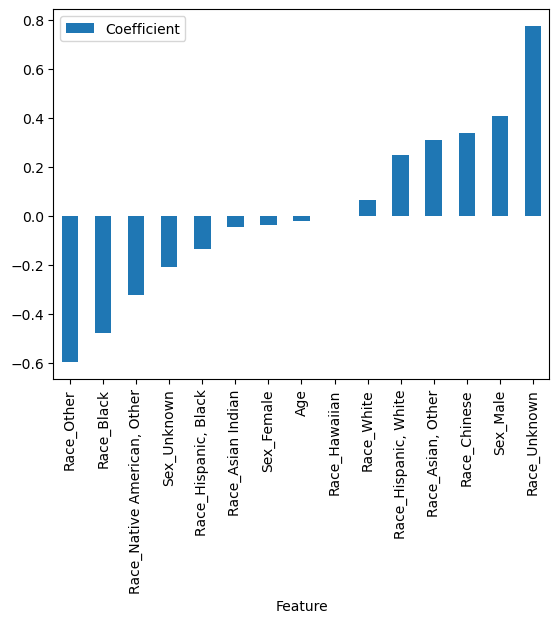

In [37]:
coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.56      0.55      0.55       766
           1       0.56      0.56      0.56       766

    accuracy                           0.56      1532
   macro avg       0.56      0.56      0.56      1532
weighted avg       0.56      0.56      0.56      1532

ROC-AUC Score: 0.5926765128946275


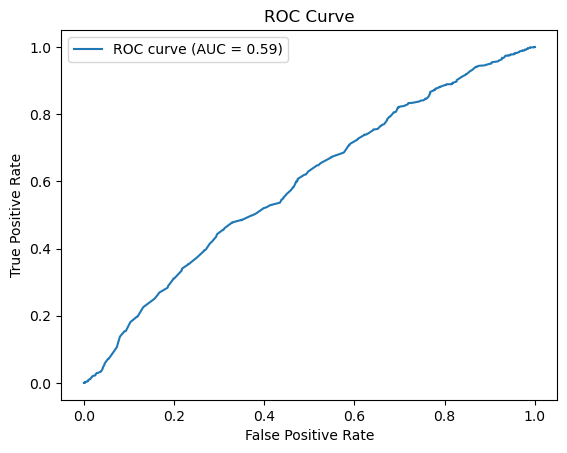

In [38]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [39]:
drop_dummy_groups = ['ResidenceCounty', 'ResidenceState', 
                       'DeathCity', 'DeathCounty', 'Location', 
                       'InjuryPlace', 'InjuryCity']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

In [40]:
X = df.drop(columns=training_default_removal + dropping)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(y.value_counts())

Heroin
0    2576
1    2529
Name: count, dtype: int64


In [41]:
regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

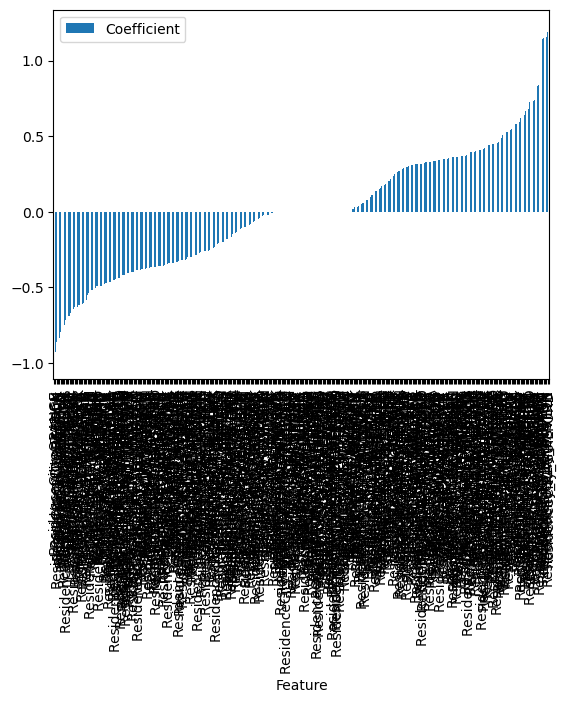

In [42]:
coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.54      0.57      0.56       766
           1       0.55      0.52      0.53       766

    accuracy                           0.54      1532
   macro avg       0.54      0.54      0.54      1532
weighted avg       0.54      0.54      0.54      1532

ROC-AUC Score: 0.5538792956527073


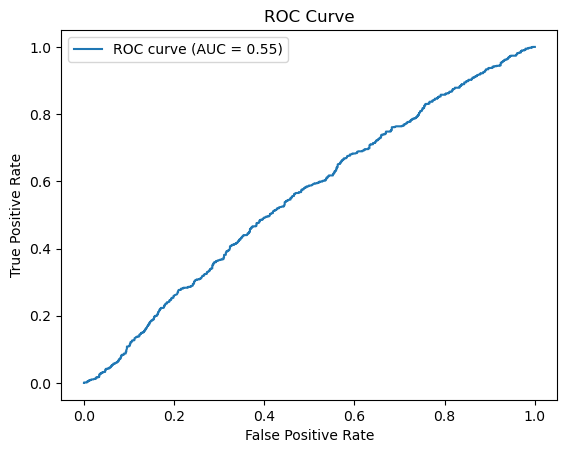

In [43]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

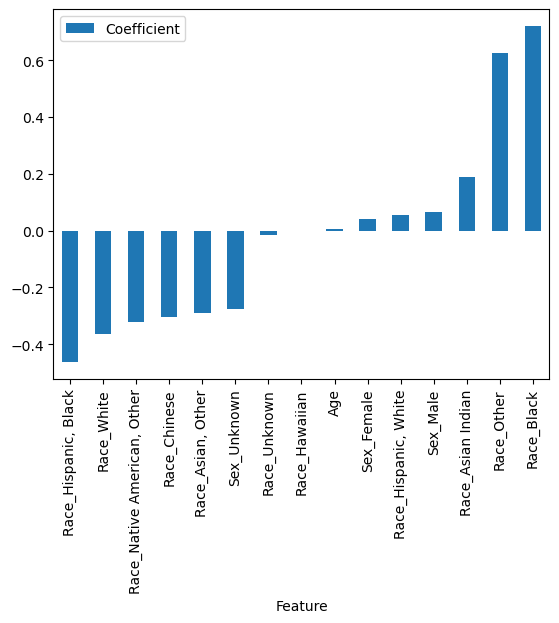

In [44]:
#WHOLE THING
drop_dummy_groups = ['ResidenceCity', 'ResidenceCounty', 'ResidenceState', 
                       'DeathCity', 'DeathCounty', 'Location', 
                       'InjuryPlace', 'InjuryCity']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Cocaine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.72      0.96      0.82      1068
           1       0.61      0.16      0.26       464

    accuracy                           0.72      1532
   macro avg       0.67      0.56      0.54      1532
weighted avg       0.69      0.72      0.65      1532

ROC-AUC Score: 0.5970221086788066


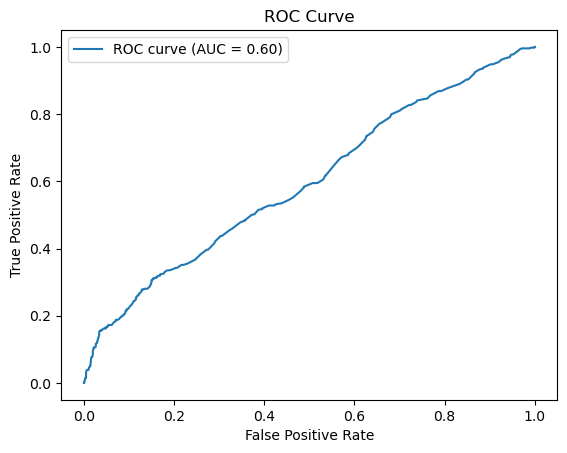

In [45]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

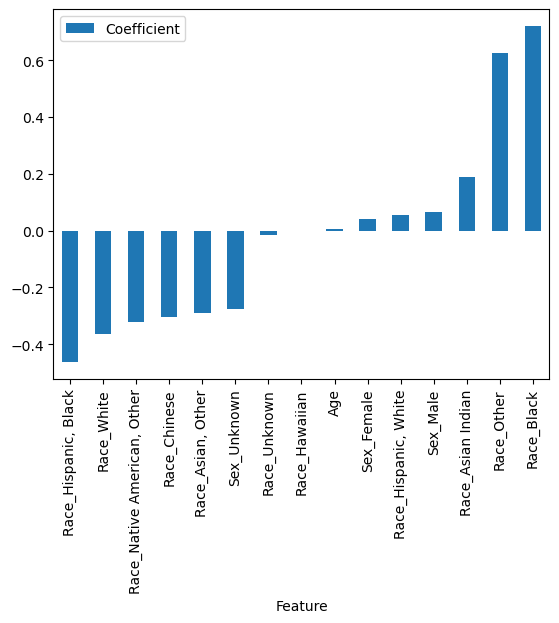

In [46]:
#WHOLE THING
drop_dummy_groups = ['ResidenceCity', 'ResidenceCounty', 'ResidenceState', 
                       'DeathCity', 'DeathCounty', 'Location', 
                       'InjuryPlace', 'InjuryCity']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Cocaine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.72      0.96      0.82      1068
           1       0.61      0.16      0.26       464

    accuracy                           0.72      1532
   macro avg       0.67      0.56      0.54      1532
weighted avg       0.69      0.72      0.65      1532

ROC-AUC Score: 0.5970221086788066


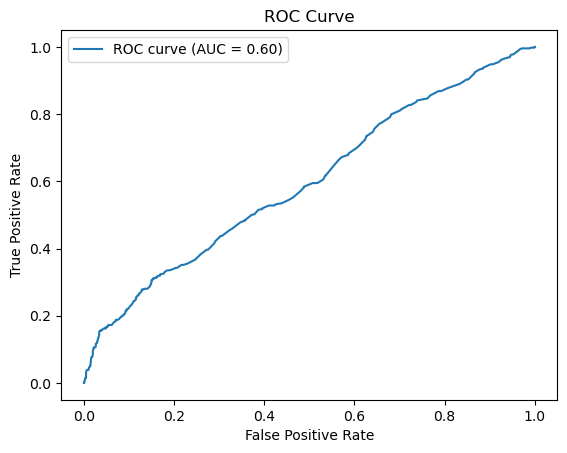

In [47]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

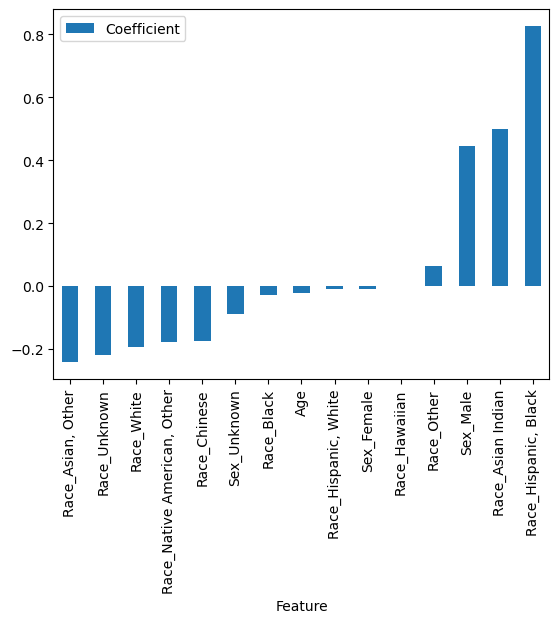

In [48]:
#WHOLE THING
drop_dummy_groups = ['ResidenceCity', 'ResidenceCounty', 'ResidenceState', 
                       'DeathCity', 'DeathCounty', 'Location', 
                       'InjuryPlace', 'InjuryCity']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Fentanyl']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.60      0.75      0.66       886
           1       0.48      0.32      0.38       646

    accuracy                           0.56      1532
   macro avg       0.54      0.53      0.52      1532
weighted avg       0.55      0.56      0.54      1532

ROC-AUC Score: 0.569869102446729


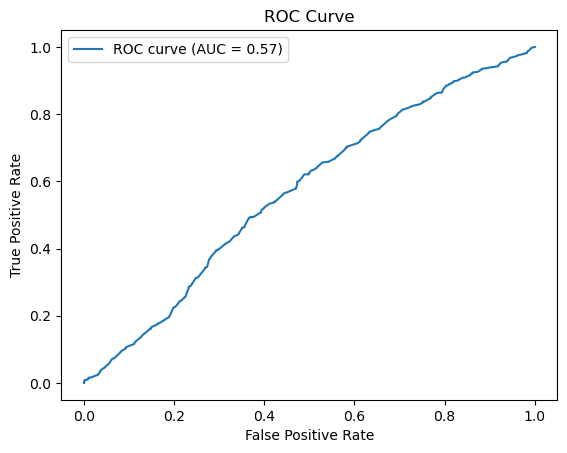

In [49]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

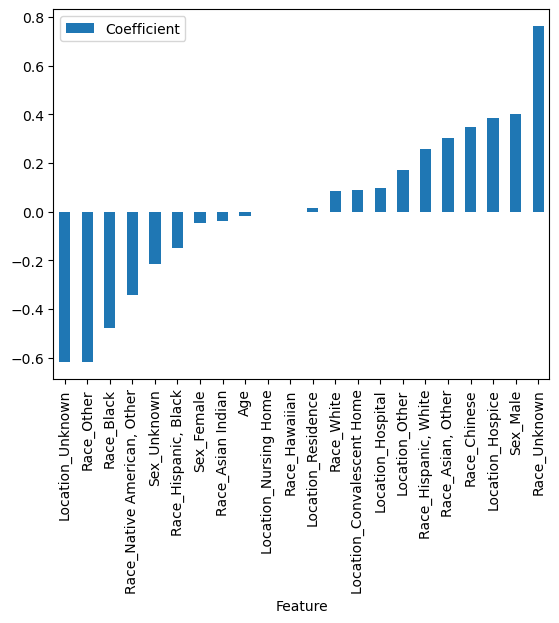

In [50]:
#WHOLE THING pt 1 ++Location
drop_dummy_groups = ['ResidenceCity', 'ResidenceCounty', 'ResidenceState', 
                       'DeathCity', 'DeathCounty', 
                       'InjuryPlace', 'InjuryCity']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.57      0.57      0.57       766
           1       0.57      0.57      0.57       766

    accuracy                           0.57      1532
   macro avg       0.57      0.57      0.57      1532
weighted avg       0.57      0.57      0.57      1532

ROC-AUC Score: 0.5996615288126581


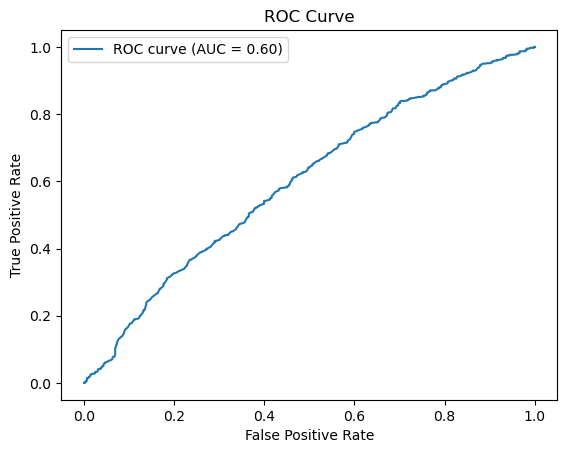

In [51]:
#pt 2
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

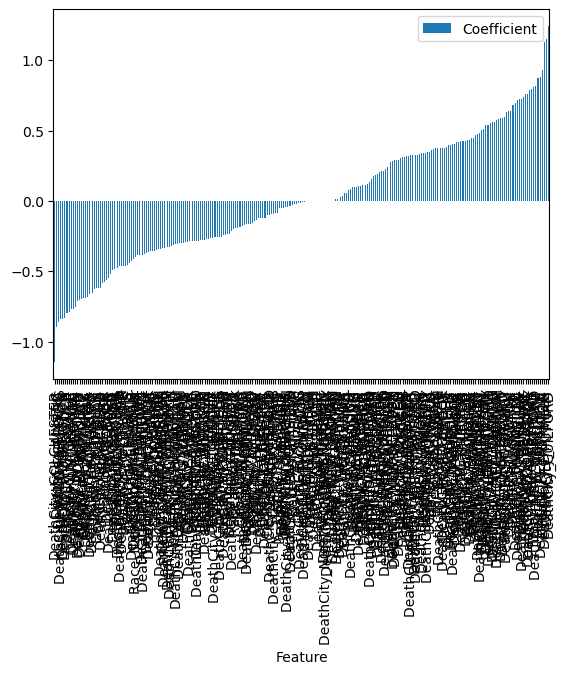

In [52]:
#WHOLE THING pt 1 ++DeathCity
drop_dummy_groups = ['ResidenceCity', 'ResidenceCounty', 'ResidenceState', 
                        'DeathCounty', 
                       'InjuryPlace', 'InjuryCity', 'Location']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.55      0.56      0.55       766
           1       0.55      0.55      0.55       766

    accuracy                           0.55      1532
   macro avg       0.55      0.55      0.55      1532
weighted avg       0.55      0.55      0.55      1532

ROC-AUC Score: 0.5606879179761264


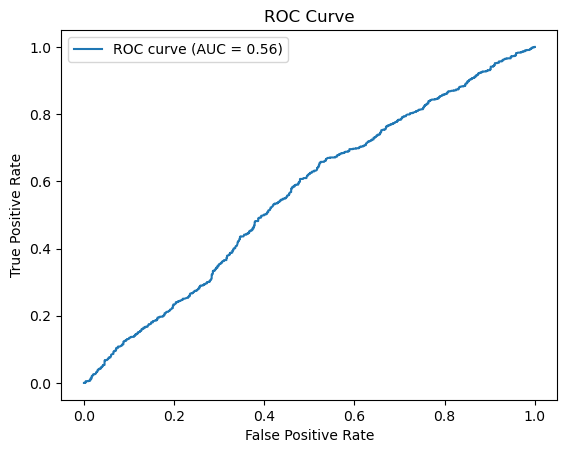

In [53]:
#pt 2
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

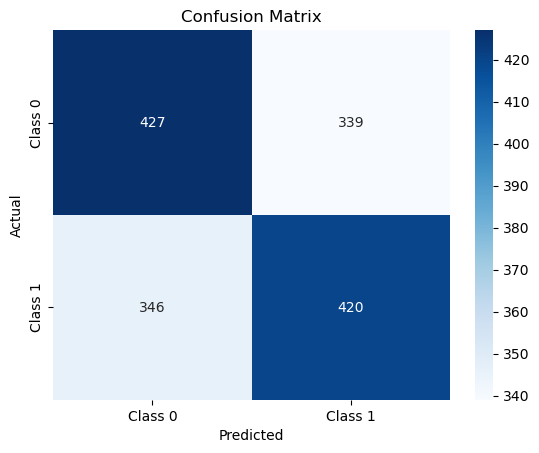

              precision    recall  f1-score   support

           0       0.55      0.56      0.55       766
           1       0.55      0.55      0.55       766

    accuracy                           0.55      1532
   macro avg       0.55      0.55      0.55      1532
weighted avg       0.55      0.55      0.55      1532



In [54]:
y_pred = regr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

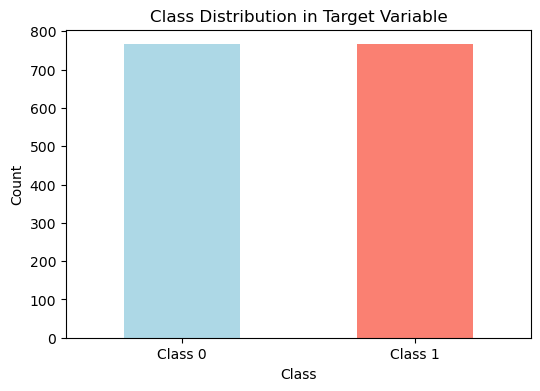

In [55]:
plt.figure(figsize=(6, 4))
y_test.value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Class Distribution in Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'], rotation=0)
plt.show()

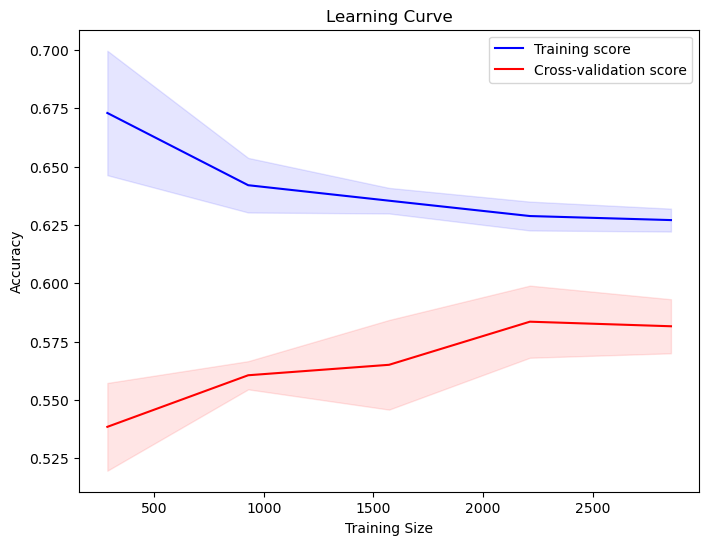

In [56]:
train_sizes, train_scores, test_scores = learning_curve(regr, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [57]:
cv_scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")
print(f"Standard deviation of CV scores: {np.std(cv_scores)}")

Cross-validation scores: [0.56083916 0.57762238 0.57902098 0.59803922 0.59103641]
Mean CV score: 0.5813116295469236
Standard deviation of CV scores: 0.012746475719181204


<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

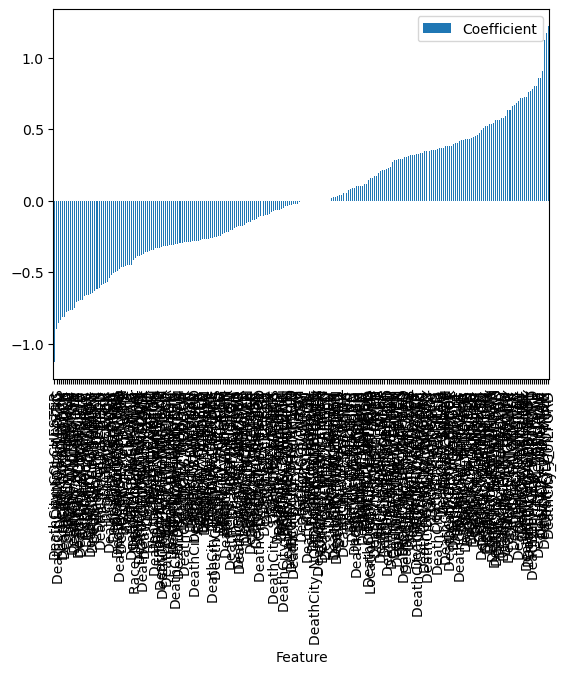

In [58]:
#WHOLE THING  ++ Deathcity Location
drop_dummy_groups = ['ResidenceCity', 'ResidenceCounty', 'ResidenceState', 
                        'DeathCounty', 
                       'InjuryPlace', 'InjuryCity']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       766
           1       0.56      0.55      0.55       766

    accuracy                           0.56      1532
   macro avg       0.56      0.56      0.56      1532
weighted avg       0.56      0.56      0.56      1532

ROC-AUC Score: 0.5673610495674521


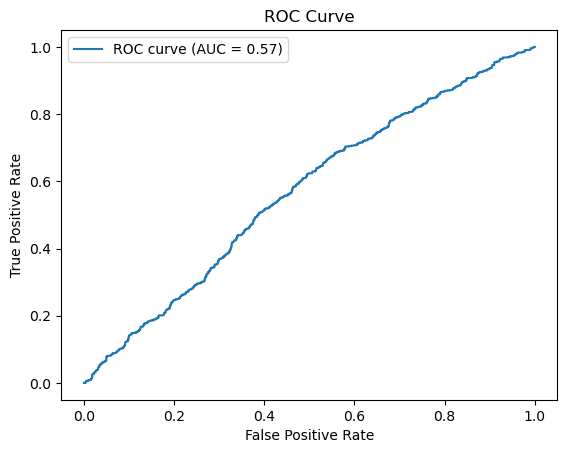

In [59]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

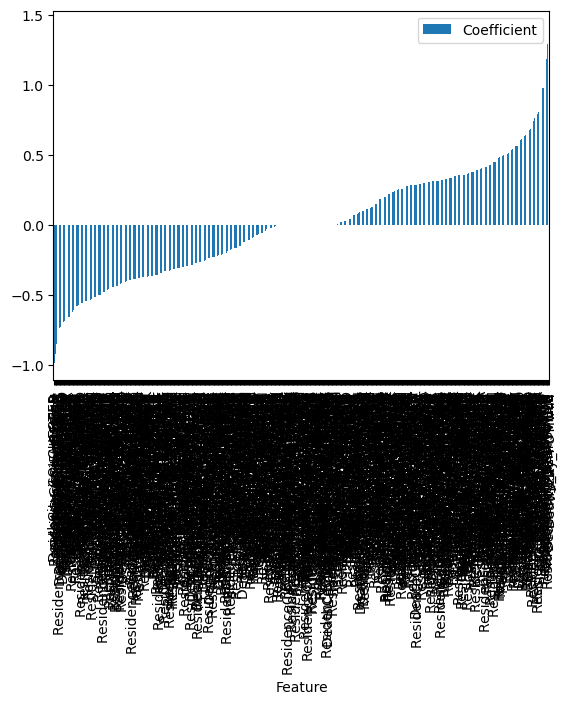

In [60]:
#WHOLE THING ++RES city DeathCity
drop_dummy_groups = ['ResidenceCounty', 'ResidenceState', 
                    'DeathCounty', 'Location', 
                       'InjuryPlace', 'InjuryCity']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.53      0.55      0.54       766
           1       0.53      0.51      0.52       766

    accuracy                           0.53      1532
   macro avg       0.53      0.53      0.53      1532
weighted avg       0.53      0.53      0.53      1532

ROC-AUC Score: 0.5419927533761905


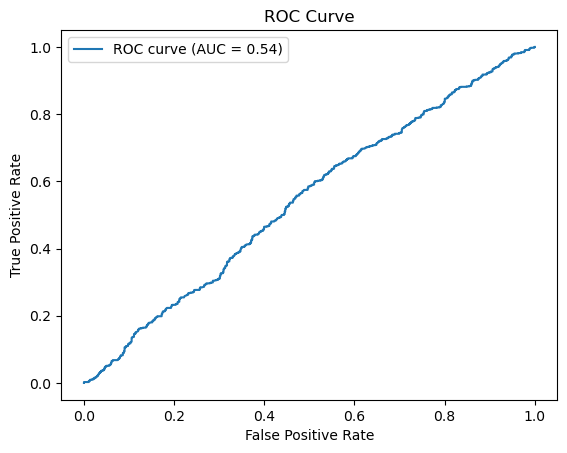

In [61]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

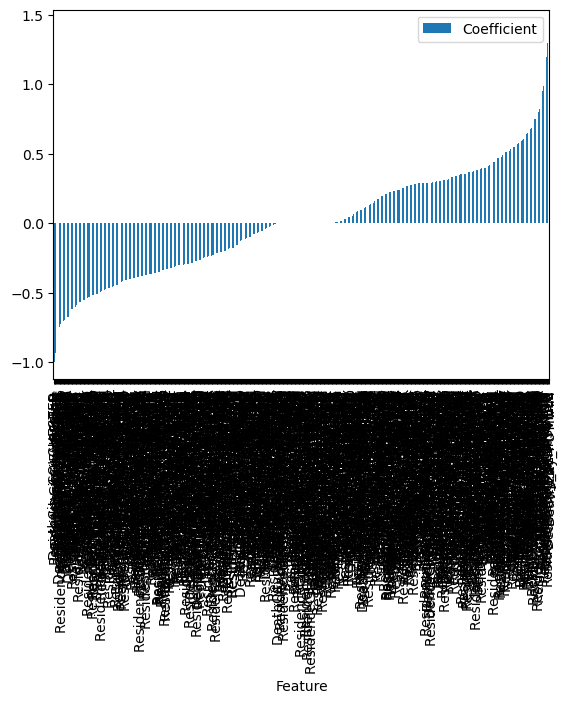

In [62]:
#WHOLE THING ++ res city death city location
drop_dummy_groups = ['ResidenceCounty', 'ResidenceState', 
                       'DeathCounty', 
                       'InjuryPlace', 'InjuryCity']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.53      0.56      0.55       766
           1       0.53      0.50      0.52       766

    accuracy                           0.53      1532
   macro avg       0.53      0.53      0.53      1532
weighted avg       0.53      0.53      0.53      1532

ROC-AUC Score: 0.5480872798914711


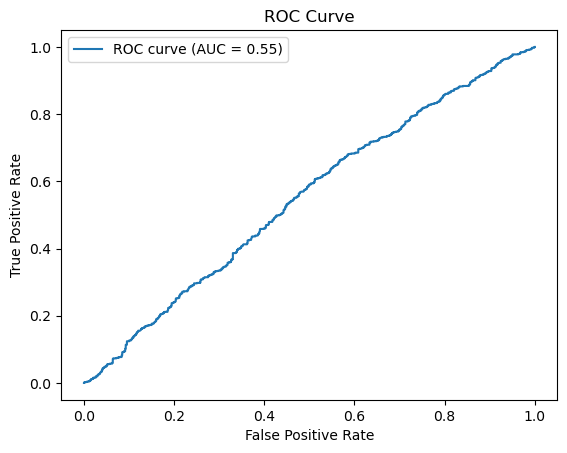

In [63]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

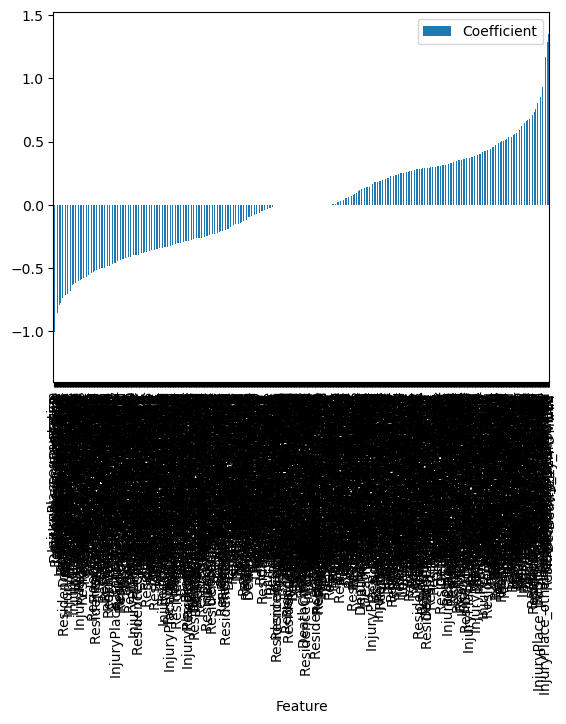

In [64]:
#WHOLE THING ++ res city death city loacation injury place
drop_dummy_groups = ['ResidenceCounty', 'ResidenceState', 
                       'DeathCounty', 
                        'InjuryCity']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.53      0.56      0.54       766
           1       0.53      0.50      0.52       766

    accuracy                           0.53      1532
   macro avg       0.53      0.53      0.53      1532
weighted avg       0.53      0.53      0.53      1532

ROC-AUC Score: 0.5446020151476935


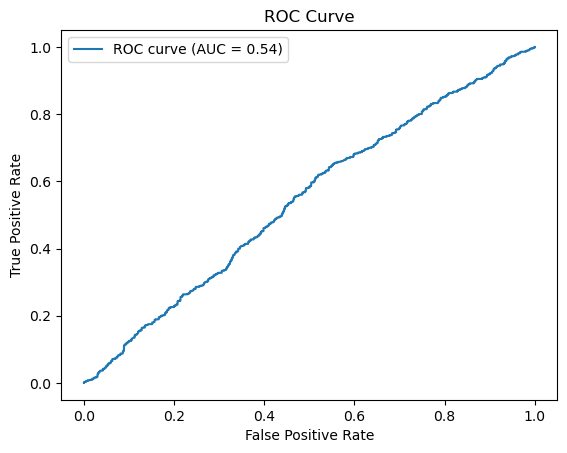

In [65]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

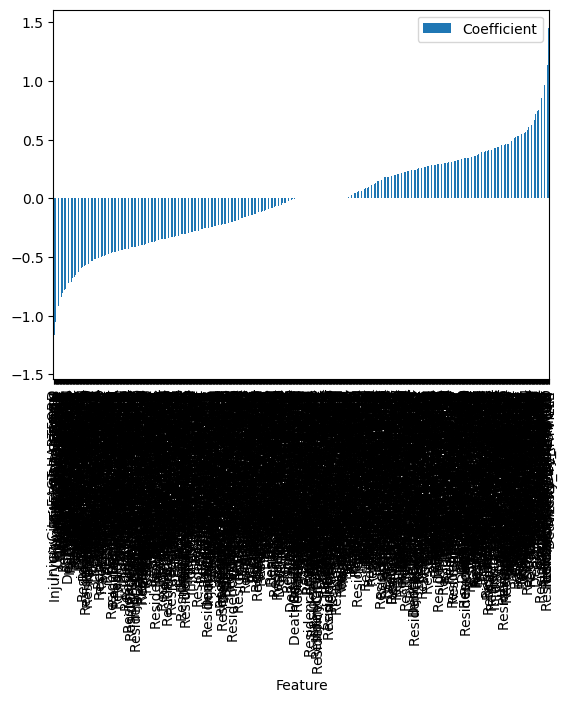

In [66]:
#WHOLE THING ++ cities
drop_dummy_groups = ['ResidenceCounty', 'ResidenceState', 
                    'DeathCounty', 'Location', 
                       'InjuryPlace']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.54      0.57      0.55       766
           1       0.54      0.51      0.53       766

    accuracy                           0.54      1532
   macro avg       0.54      0.54      0.54      1532
weighted avg       0.54      0.54      0.54      1532

ROC-AUC Score: 0.5439501257763022


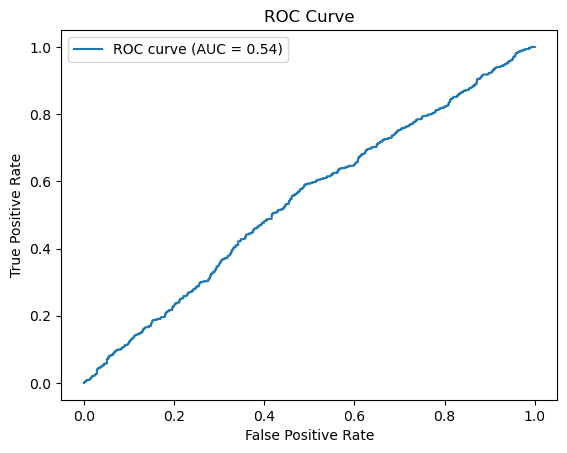

In [67]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

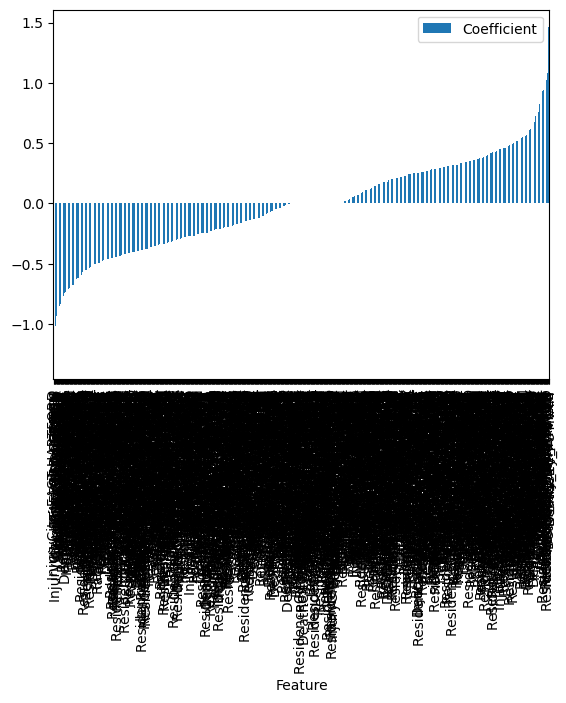

In [68]:
#WHOLE THING ++ all
drop_dummy_groups = ['ResidenceCounty', 
                    'DeathCounty', 
                       'InjuryPlace']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.54      0.57      0.56       766
           1       0.55      0.51      0.53       766

    accuracy                           0.54      1532
   macro avg       0.54      0.54      0.54      1532
weighted avg       0.54      0.54      0.54      1532

ROC-AUC Score: 0.5500795901533175


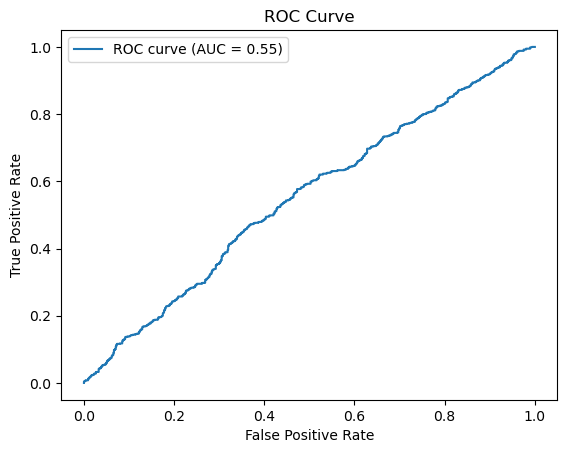

In [69]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

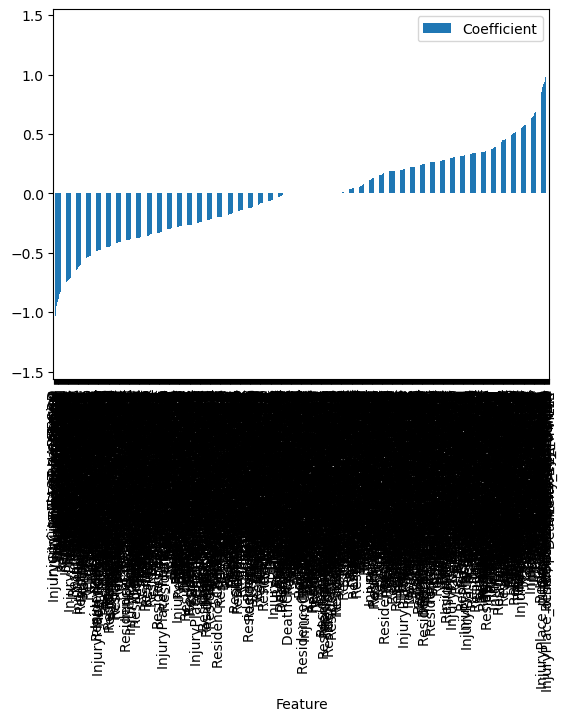

In [70]:
#WHOLE THING ++ all
drop_dummy_groups = []

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.54      0.57      0.55       766
           1       0.55      0.52      0.53       766

    accuracy                           0.54      1532
   macro avg       0.54      0.54      0.54      1532
weighted avg       0.54      0.54      0.54      1532

ROC-AUC Score: 0.5591455392019852


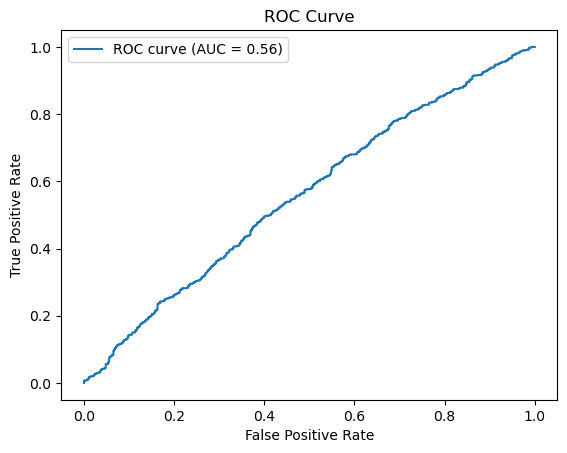

In [71]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

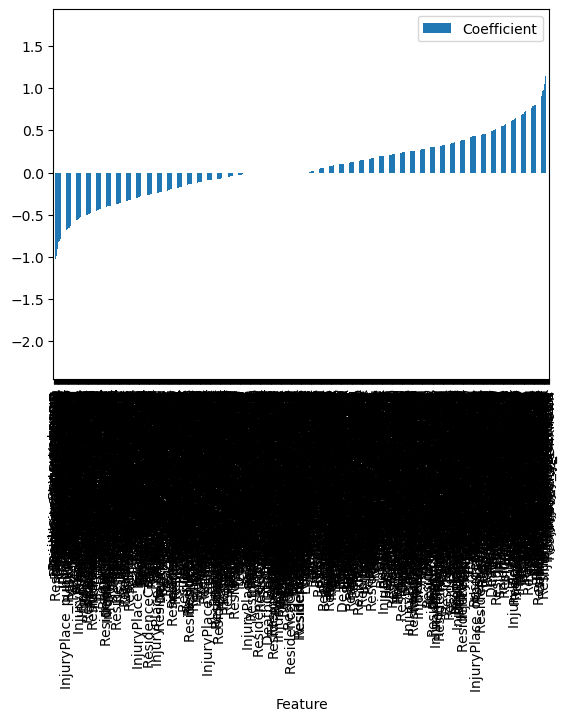

In [72]:
#WHOLE THING ++ all
drop_dummy_groups = []

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Fentanyl']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       886
           1       0.62      0.68      0.65       646

    accuracy                           0.69      1532
   macro avg       0.69      0.69      0.69      1532
weighted avg       0.70      0.69      0.69      1532

ROC-AUC Score: 0.7608079586830574


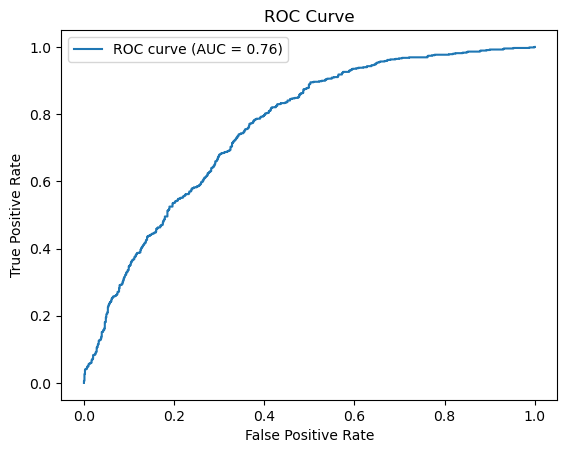

In [73]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

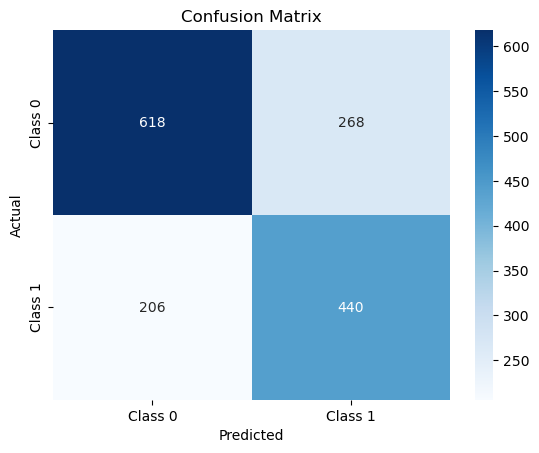

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       886
           1       0.62      0.68      0.65       646

    accuracy                           0.69      1532
   macro avg       0.69      0.69      0.69      1532
weighted avg       0.70      0.69      0.69      1532



In [74]:
y_pred = regr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

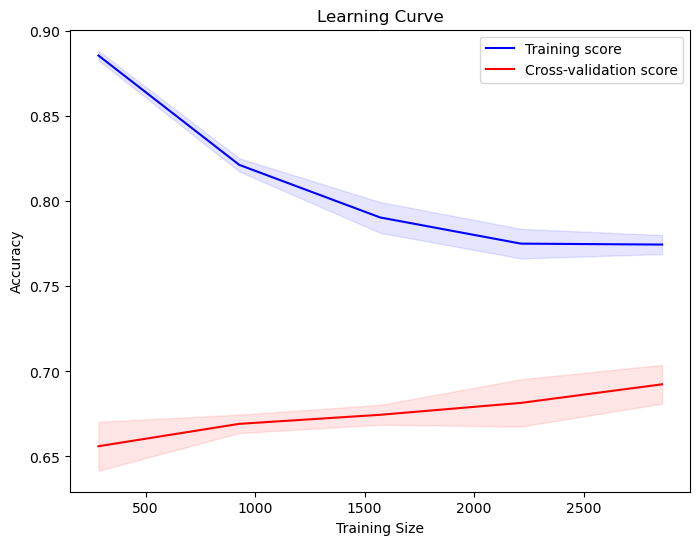

In [75]:
train_sizes, train_scores, test_scores = learning_curve(regr, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

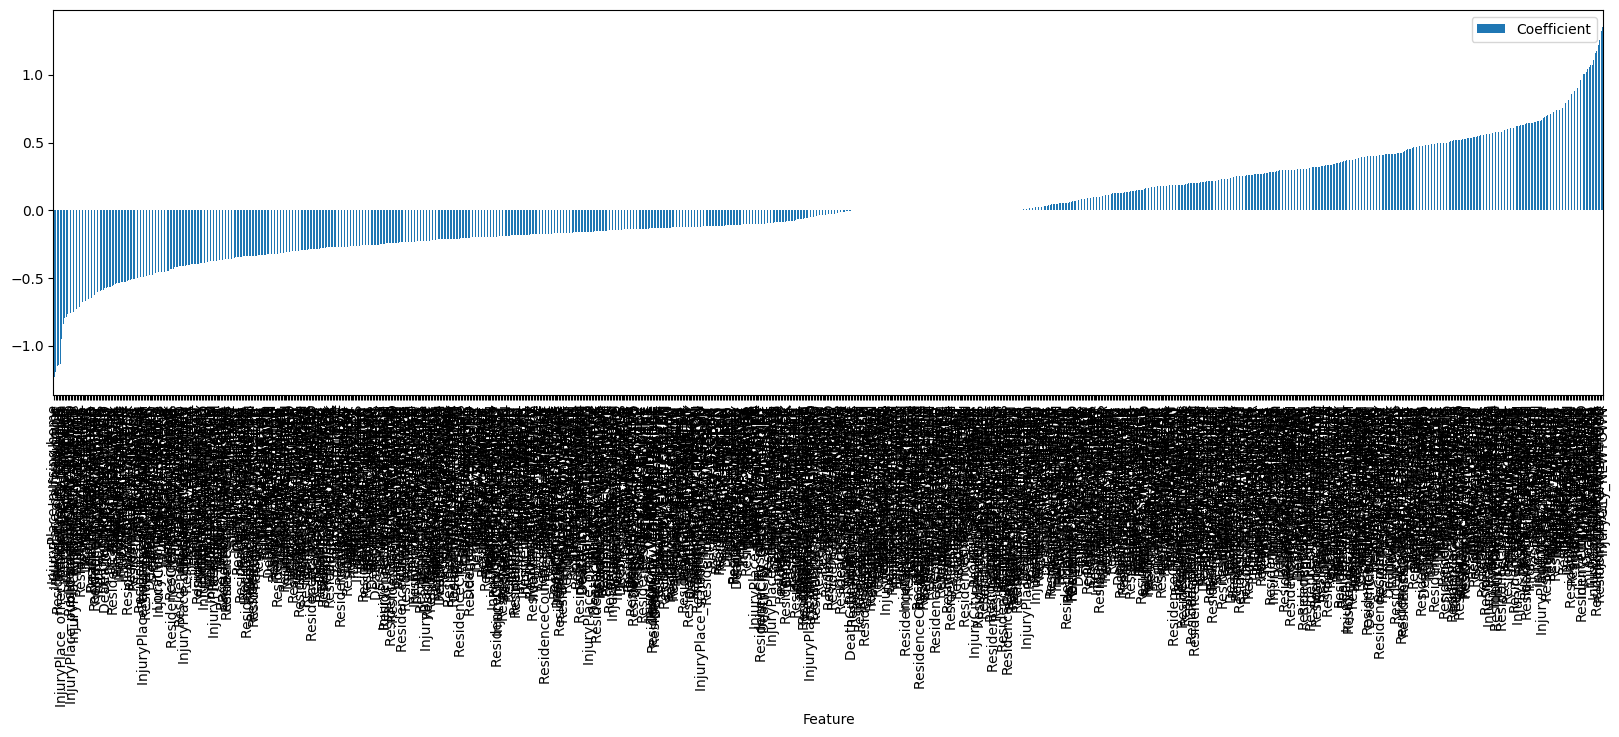

In [76]:
#WHOLE THING ++ all
drop_dummy_groups = []

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Cocaine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient', figsize=(20, 5))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      1068
           1       0.51      0.19      0.28       464

    accuracy                           0.70      1532
   macro avg       0.62      0.56      0.54      1532
weighted avg       0.66      0.70      0.65      1532

ROC-AUC Score: 0.6128943077618494


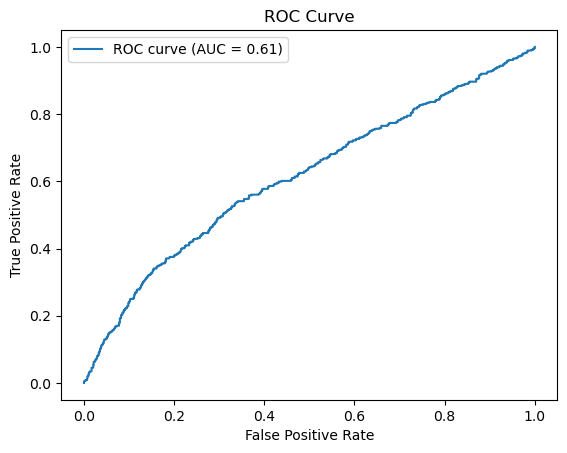

In [77]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

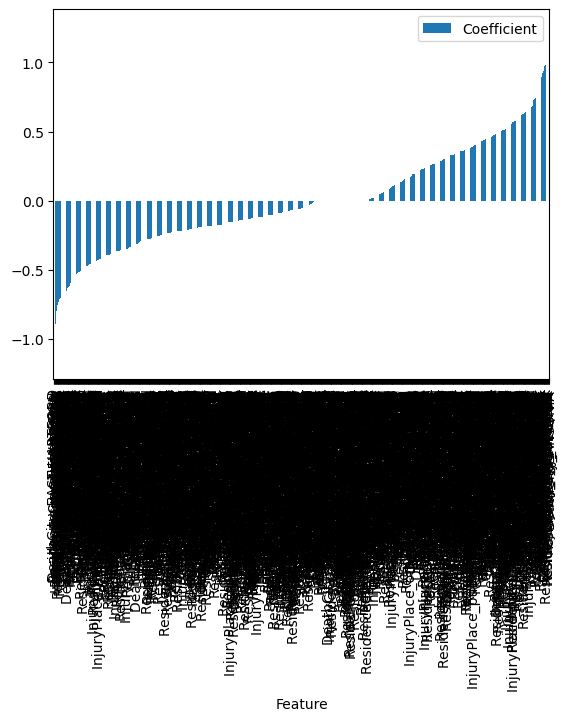

In [78]:
#WHOLE THING ++ all
drop_dummy_groups = []

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Benzodiazepine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = LogisticRegression(max_iter=1000)
regr.fit(X_train, y_train)

coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1101
           1       0.41      0.11      0.17       431

    accuracy                           0.71      1532
   macro avg       0.57      0.52      0.50      1532
weighted avg       0.64      0.71      0.64      1532

ROC-AUC Score: 0.6133635104977335


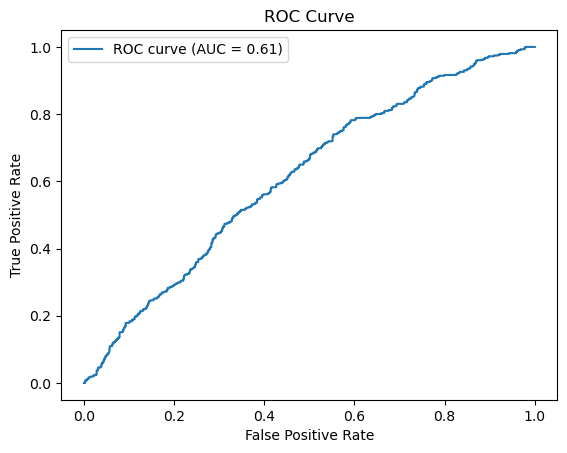

In [79]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()